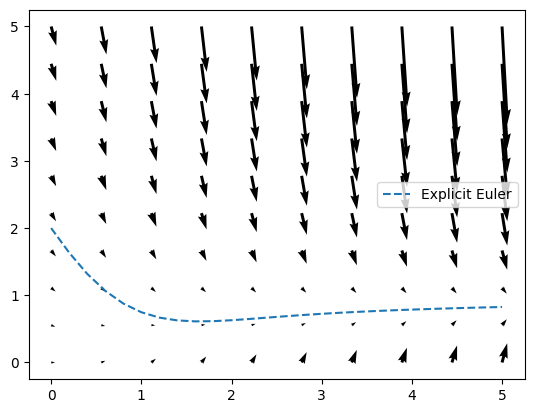

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def explicit(x_end, h, x0, y0, f):
    xs = np.arange(x0, x_end + 1/2 * h, h, dtype=float)
    ys = np.zeros_like(xs, dtype=float)
    ys[0] = y0

    for i, x in enumerate(xs[:-1]):
        y = ys[i]
        r1 = f(x, y)
        r2 = f(x+1/3*h, y + 1/3*r1*h)
        r3 = f(x-1/3*h, y - 1/3*r1*h + 1 * r2 * h)
        r4 = f(x+1*h,   y + 1*r1*h - 1*r2*h + 1*r3*h)
        r = 1/8*r1 + 3/8 * r2 + 3/8 * r3 + 1/8 * r4
        ys[i+1] = y + r * h

    return np.array(xs), np.array(ys)


f = lambda x, y: x - y - x * y

# explicit
x, y = explicit(x_end=5, h=0.2, x0=0, y0=2, f=f)
plt.plot(x, y,'--', label="Explicit Euler")

# quiver
qx = np.linspace(0, 5, 10)
qy = np.linspace(0, 5, 10)
xv, yv = np.meshgrid(qx, qy)
plt.quiver(xv, yv, np.ones_like(xv), f(xv, yv), angles="xy")

plt.legend()
plt.show()

In [10]:
ref = 0.82824999
err = y[-1]-ref
print(err)

-0.002438630163991262


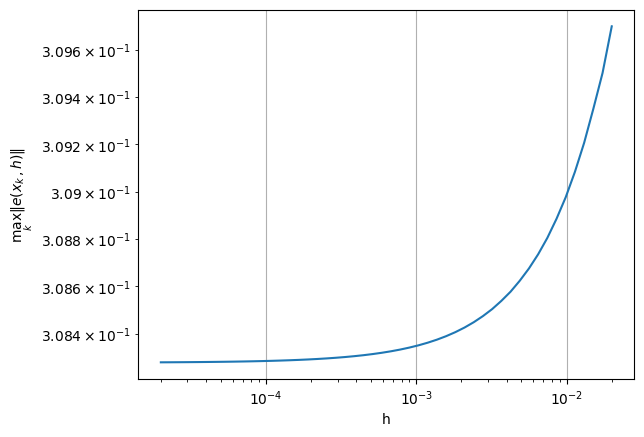

In [11]:
n = 10**np.linspace(2,5)
hs = 2/n
err = []
for h in hs:
    x, y = explicit(2,h,0,1,f)
    err.append(np.linalg.norm(y-ref,np.inf))

plt.loglog(hs,err,'-')
plt.xlabel('h')
plt.ylabel(r'$\max_k \|e(x_k,h)\|$')
plt.grid()
plt.show()